# Task: Predict Restaurent Ratings 

## Objective: Build a machine learning model to predict the aggregate rating of a restaurant based on other features.

### Steps:
* Preprocess the dataset by handling missing values, encoding categorical variables, and splitting the data into training and testing sets.
* Select a regression algorithm (e.g., linear regression, decision tree regression) and train it on the training data.
* Evaluate the model's performance using appropriate regression metrics (e.g., mean squared error, R-squared)
on the testing data.
* Interpret the model's results and analyze the most influential features affecting restaurant ratings.

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv("Dataset .csv")
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [4]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [5]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
df[df["Cuisines"].isnull()]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
84,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,NaN,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,34
87,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,NaN,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,36
94,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.575100,NaN,...,Dollar($),No,No,No,No,1,3.9,Yellow,Good,160
297,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,NaN,...,Dollar($),No,No,No,No,3,3.9,Yellow,Good,209
328,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,NaN,...,Dollar($),No,No,No,No,3,3.8,Yellow,Good,102
346,17606621,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,NaN,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,11
368,17059060,Hillstone,216,Orlando,"215 South Orlando Avenue, Winter Park, FL 32789",Winter Park,"Winter Park, Orlando",-81.365260,28.596682,NaN,...,Dollar($),No,No,No,No,3,4.4,Green,Very Good,1158
418,17142698,Leonard's Bakery,216,Rest of Hawaii,"933 Kapahulu Ave, Honolulu, HI 96816",Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,NaN,...,Dollar($),No,No,No,No,1,4.7,Dark Green,Excellent,707
455,17616465,Tybee Island Social Club,216,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,NaN,...,Dollar($),No,No,No,No,1,3.9,Yellow,Good,309


In [7]:
df.shape

(9551, 21)

In [8]:
df.dropna(subset = ['Cuisines'], inplace = True)

In [9]:
import seaborn as sns 
import matplotlib.pyplot as plt 

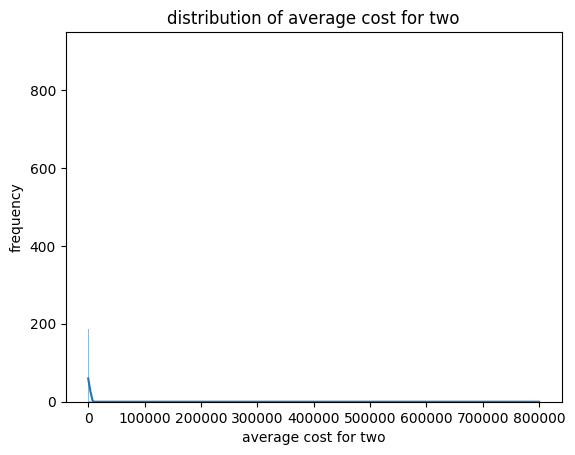

In [10]:
sns.histplot(df['Average Cost for two'], kde = True)
plt.title("distribution of average cost for two")
plt.xlabel("average cost for two")
plt.ylabel("frequency")
plt.show()

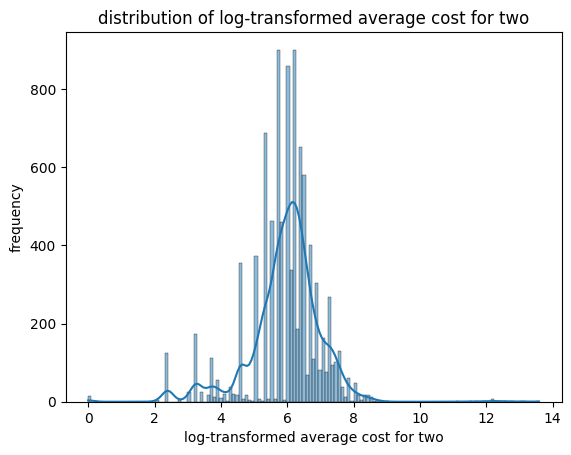

In [11]:
log_cost = np.log1p(df['Average Cost for two'])

sns.histplot(log_cost, kde = True)
plt.title("distribution of log-transformed average cost for two")
plt.xlabel("log-transformed average cost for two")
plt.ylabel("frequency")
plt.show()

In [12]:
df.nunique()
df['Cuisines'].nunique() #Gives the number of unique cuisines

1825

In [13]:
df["Cuisines"].value_counts()

Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1825, dtype: int64

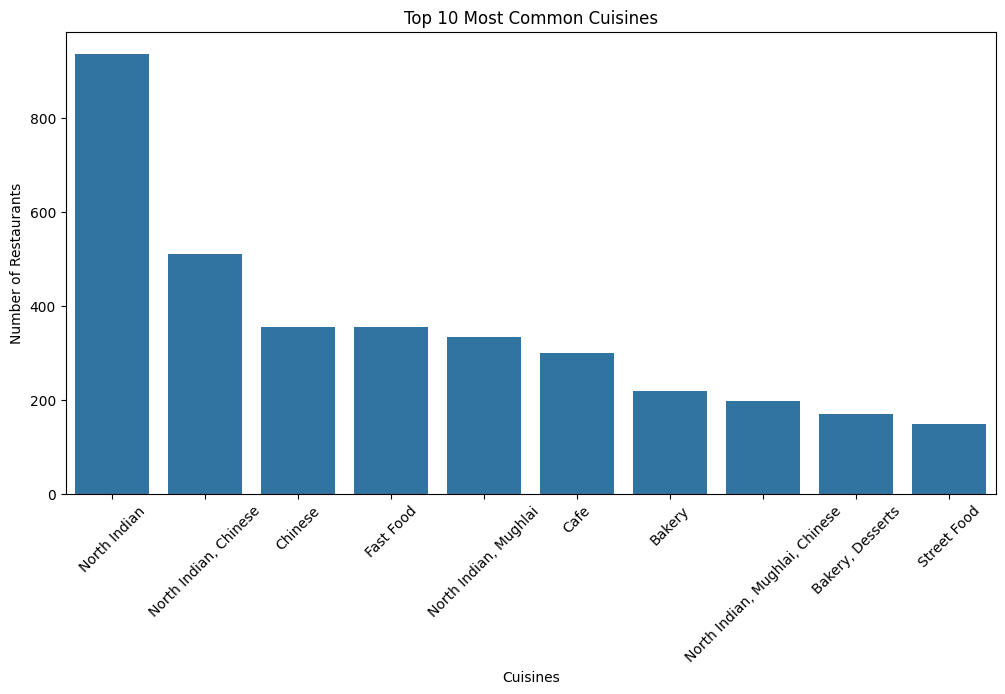

In [14]:
top_cuisines = df["Cuisines"].value_counts().head(10)

plt.figure(figsize = (12, 6))
sns.barplot(x = top_cuisines.index, y = top_cuisines.values)
plt.title('Top 10 Most Common Cuisines')
plt.xlabel('Cuisines')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation = 45)
plt.show()

In [15]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [16]:
df["City"].nunique()

140

In [17]:
df["City"].value_counts()

City
New Delhi         5473
Gurgaon           1118
Noida             1080
Faridabad          251
Ghaziabad           25
                  ... 
Lincoln              1
Lakeview             1
Lakes Entrance       1
Inverloch            1
Panchkula            1
Name: count, Length: 140, dtype: int64

C:\Users\Tejas Bhosale\AppData\Local\Temp\ipykernel_30304\289963401.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_cities.index, y = top_cities.values, palette = 'viridis')


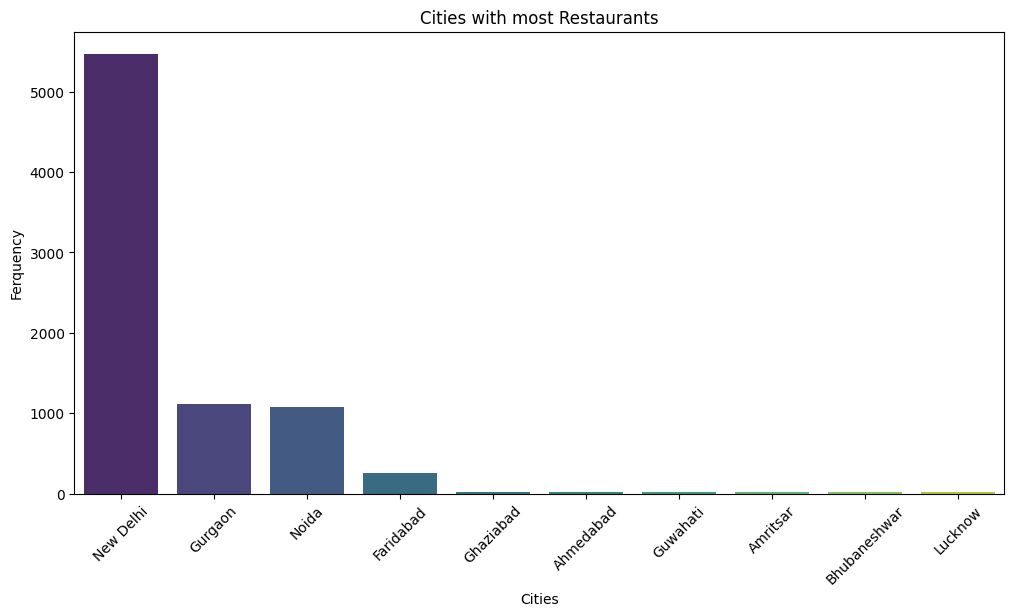

In [18]:
plt.figure(figsize = (12, 6))
top_cities = df["City"].value_counts().head(10)
sns.barplot(x = top_cities.index, y = top_cities.values, palette = 'viridis')
plt.title('Cities with most Restaurants')
plt.xlabel("Cities")
plt.ylabel("Ferquency")
plt.xticks(rotation = 45)
plt.show()

In [19]:
df["Rating text"].value_counts()

Rating text
Average      3734
Not rated    2148
Good         2096
Very Good    1078
Excellent     300
Poor          186
Name: count, dtype: int64

In [20]:
df.groupby("Rating text")['Aggregate rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Rating text,,,,,,,,
Average,3734.0,3.051339,0.251366,2.5,2.9,3.1,3.3,3.4
Excellent,300.0,4.659667,0.150606,4.5,4.5,4.6,4.8,4.9
Good,2096.0,3.683063,0.138951,3.5,3.6,3.7,3.8,3.9
Not rated,2148.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Poor,186.0,2.297849,0.126045,1.8,2.2,2.3,2.4,2.4
Very Good,1078.0,4.167904,0.135347,4.0,4.1,4.1,4.3,4.4


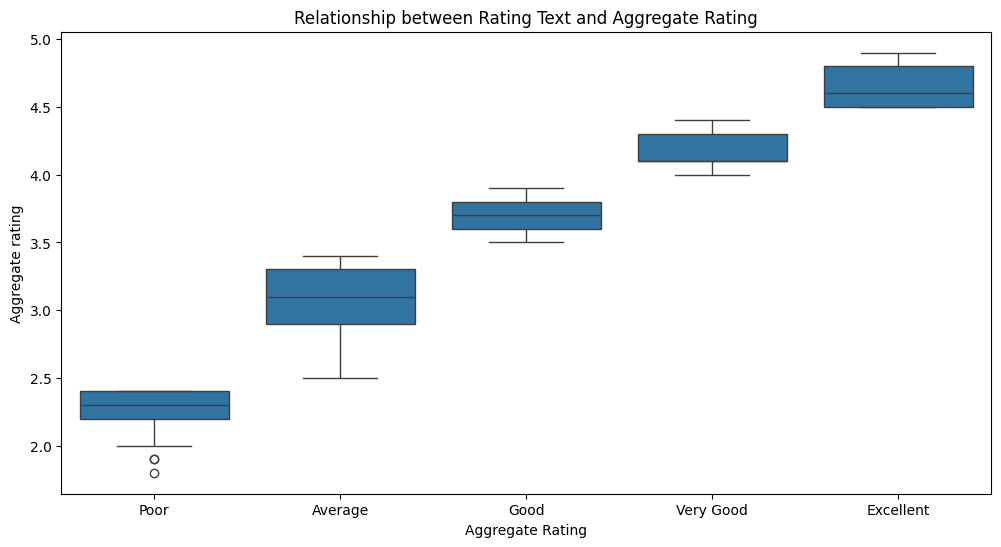

In [21]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = "Rating text", y = "Aggregate rating", data = df, order = ['Poor', 'Average', 'Good', 'Very Good', 'Excellent'])

plt.title("Relationship between Rating Text and Aggregate Rating")
plt.xlabel("Rating Category")
plt.xlabel("Aggregate Rating")
plt.show()

In [22]:
df["Rating color"].value_counts()

Rating color
Orange        3734
White         2148
Yellow        2096
Green         1078
Dark Green     300
Red            186
Name: count, dtype: int64

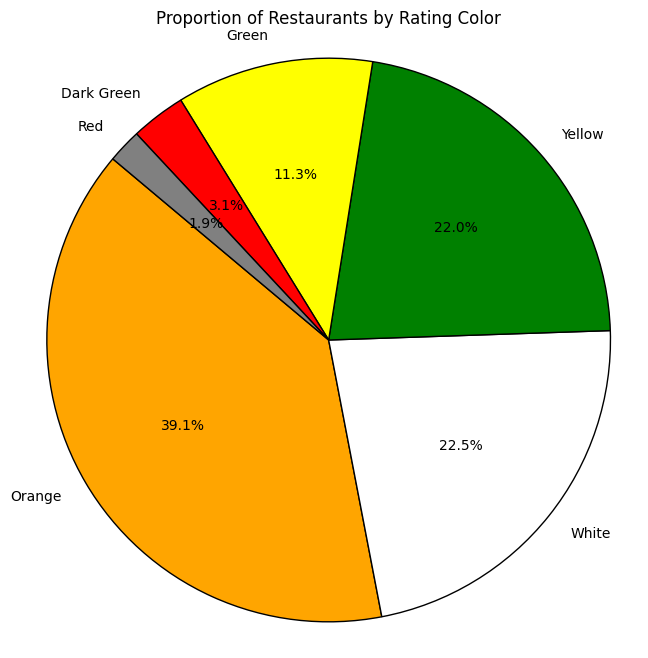

In [23]:
rating_color_count = df["Rating color"].value_counts()
labels = rating_color_count.index
sizes = rating_color_count.values

slice_colors = ['#FFA500', '#FFFFFF', '#008000', '#FFFF00', '#FF0000', '#808080']

plt.figure(figsize = (8,8))
plt.pie(sizes, labels = labels, colors = slice_colors, autopct = "%1.1f%%", startangle = 140, wedgeprops= {'edgecolor': 'black'})
plt.title("Proportion of Restaurants by Rating Color")
plt.axis("equal")
plt.show()

In [24]:
rating_summary = df.groupby(["Aggregate rating", "Rating color", "Rating text"]).size().reset_index().rename(columns = {0: "Restaurant Count"})

In [25]:
rating_summary 


,Aggregate rating,Rating color,Rating text,Restaurant Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [26]:
online_delivery_counts = df["Has Online delivery"].value_counts()
print(online_delivery_counts)

Has Online delivery
No     7091
Yes    2451
Name: count, dtype: int64


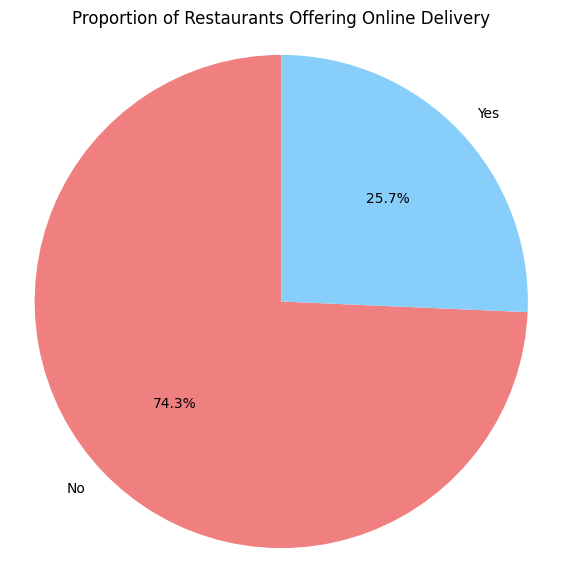

In [27]:
# The data is already calculated in online_delivery_counts
labels = online_delivery_counts.index
sizes = online_delivery_counts.values

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])

plt.title('Proportion of Restaurants Offering Online Delivery')
plt.axis('equal')  # Ensures the pie chart is a circle
plt.show()

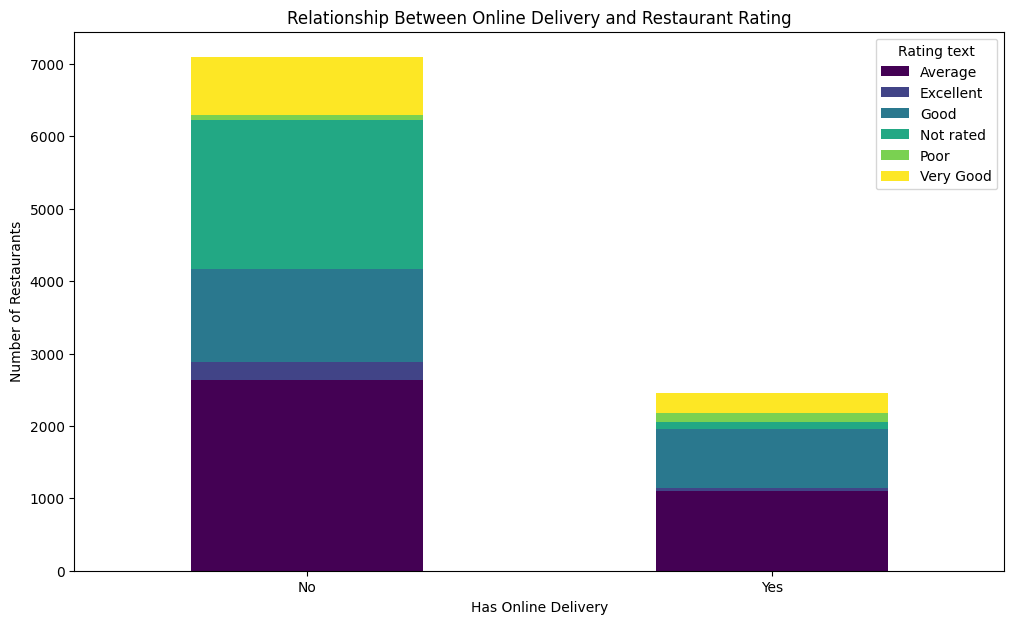

In [28]:
delivery_rating_crosstab = pd.crosstab(df["Has Online delivery"], df["Rating text"])

delivery_rating_crosstab.plot(kind = "bar", stacked = True, figsize = (12, 7), colormap = "viridis")
plt.title("Relationship Between Online Delivery and Restaurant Rating")
plt.xlabel("Has Online Delivery")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation = 0)
plt.legend(title = 'Rating text')
plt.show()

In [29]:
print(delivery_rating_crosstab)

Rating text          Average  Excellent  Good  Not rated  Poor  Very Good
Has Online delivery                                                      
No                      2629        261  1278       2052    70        801
Yes                     1105         39   818         96   116        277


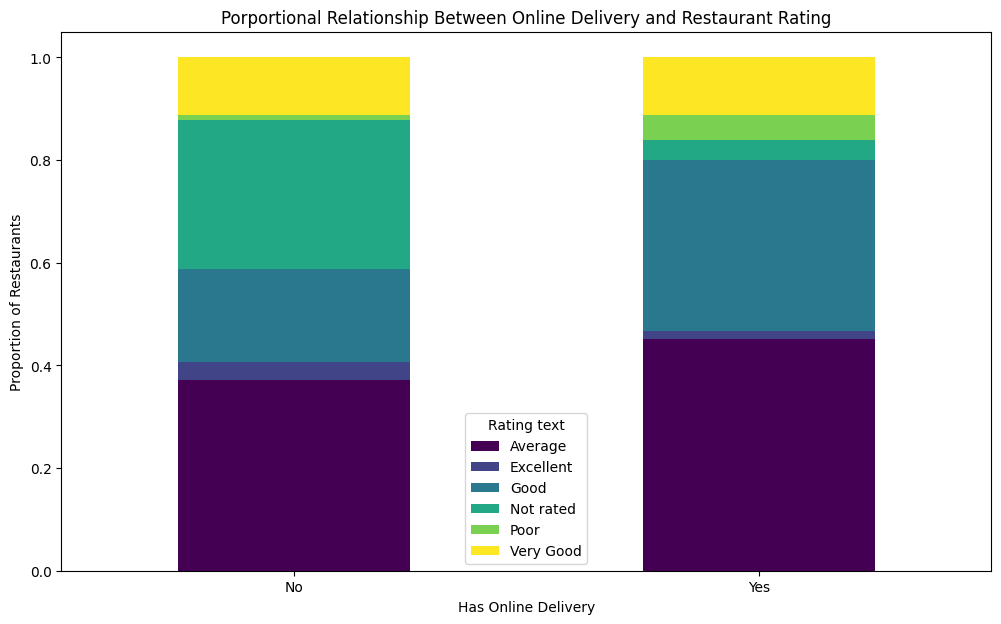

In [30]:
delivery_rating_normalized= delivery_rating_crosstab.div(delivery_rating_crosstab.sum(axis = 1), axis = 0)

delivery_rating_normalized.plot(kind = "bar", stacked = True, figsize = (12, 7), colormap = "viridis")
plt.title("Porportional Relationship Between Online Delivery and Restaurant Rating")
plt.xlabel("Has Online Delivery")
plt.ylabel("Proportion of Restaurants")
plt.xticks(rotation = 0)
plt.legend(title = 'Rating text')
plt.show()

In [31]:
print(delivery_rating_crosstab.sum(axis = 1))

Has Online delivery
No     7091
Yes    2451
dtype: int64


In [32]:
print(delivery_rating_normalized)

Rating text           Average  Excellent      Good  Not rated      Poor  \
Has Online delivery                                                       
No                   0.370752   0.036807  0.180228   0.289381  0.009872   
Yes                  0.450836   0.015912  0.333741   0.039168  0.047328   

Rating text          Very Good  
Has Online delivery             
No                    0.112960  
Yes                   0.113015  


In [33]:
table_booking_counts = df["Has Table booking"].value_counts()

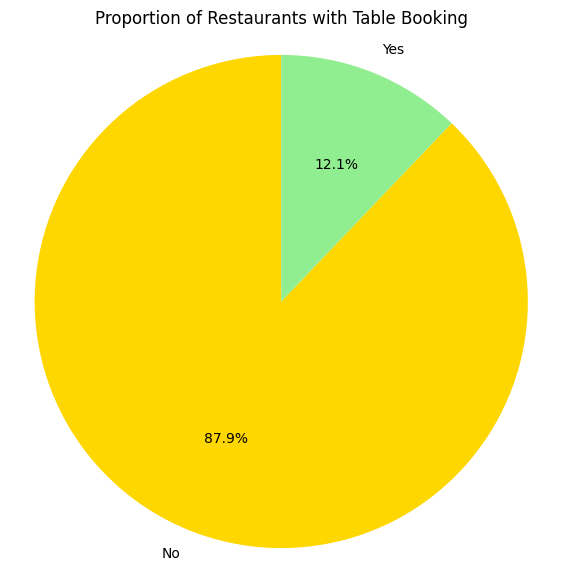

In [34]:
labels = table_booking_counts.index
sizes = table_booking_counts.values

plt.figure(figsize = (7,7))
plt.pie (sizes, labels = labels, autopct = "%1.1f%%", startangle=90 , colors = ["gold", "lightgreen"])
plt.title("Proportion of Restaurants with Table Booking")
plt.axis('equal') # ensures that the pie chart is circle
plt.show()

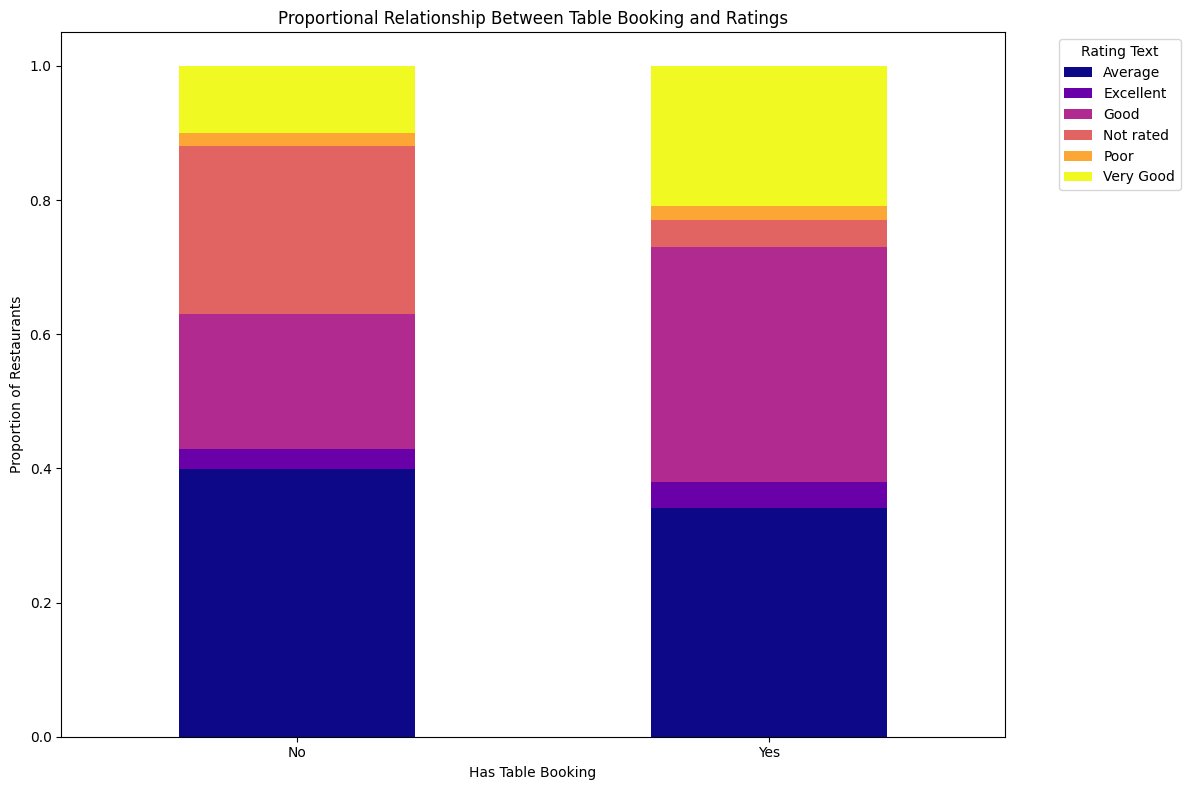

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a cross-tabulation of 'Has Table booking' and 'Rating text'
booking_rating_crosstab = pd.crosstab(df['Has Table booking'], df['Rating text'])

# Normalize the cross-tabulation to get proportions
booking_rating_normalized = booking_rating_crosstab.div(booking_rating_crosstab.sum(axis=1), axis=0)

# Plot the 100% stacked bar chart
booking_rating_normalized.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='plasma')

plt.title('Proportional Relationship Between Table Booking and Ratings')
plt.xlabel('Has Table Booking')
plt.ylabel('Proportion of Restaurants')
plt.xticks(rotation=0)
plt.legend(title='Rating Text', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [36]:
# Create a new column to categorize restaurants by their online service offerings
def classify_services(row):
    if row['Has Online delivery'] == 'Yes' and row['Has Table booking'] == 'Yes':
        return 'Both'
    elif row['Has Online delivery'] == 'Yes' and row['Has Table booking'] == 'No':
        return 'Delivery Only'
    elif row['Has Online delivery'] == 'No' and row['Has Table booking'] == 'Yes':
        return 'Booking Only'
    else:
        return 'Neither'

df['Online Services'] = df.apply(classify_services, axis=1)

# Now, let's see the distribution of these new categories
service_counts = df['Online Services'].value_counts()
print(service_counts)

Online Services
Neither          6368
Delivery Only    2016
Booking Only      723
Both              435
Name: count, dtype: int64


In [37]:
# service_rating_crosstab = pd.crosstab(df['Online Services'], df["Rating text"])
# print(service_rating_crosstab)

# service_rating_normalized = service_rating_crosstab.div(service_rating_crosstab.sum(axis = 1), axis = 0)

# rating_order = ['Excellent', 'Very Good', 'Good', 'Average', 'Poor']
# services_rating_normalized = service_rating_normalized[rating_order]

# services_rating_normalized.plot(kind='bar', stacked=True, figsize=(14, 9), colormap='viridis')

# plt.title('Rating Distribution by Online Service Combination')
# plt.xlabel('Type of Online Service Offered')
# plt.ylabel('Proportion of Restaurants')
# plt.xticks(rotation=0)
# plt.legend(title='Rating Text', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()


In [38]:
df['Rating text'].value_counts()

Rating text
Average      3734
Not rated    2148
Good         2096
Very Good    1078
Excellent     300
Poor          186
Name: count, dtype: int64

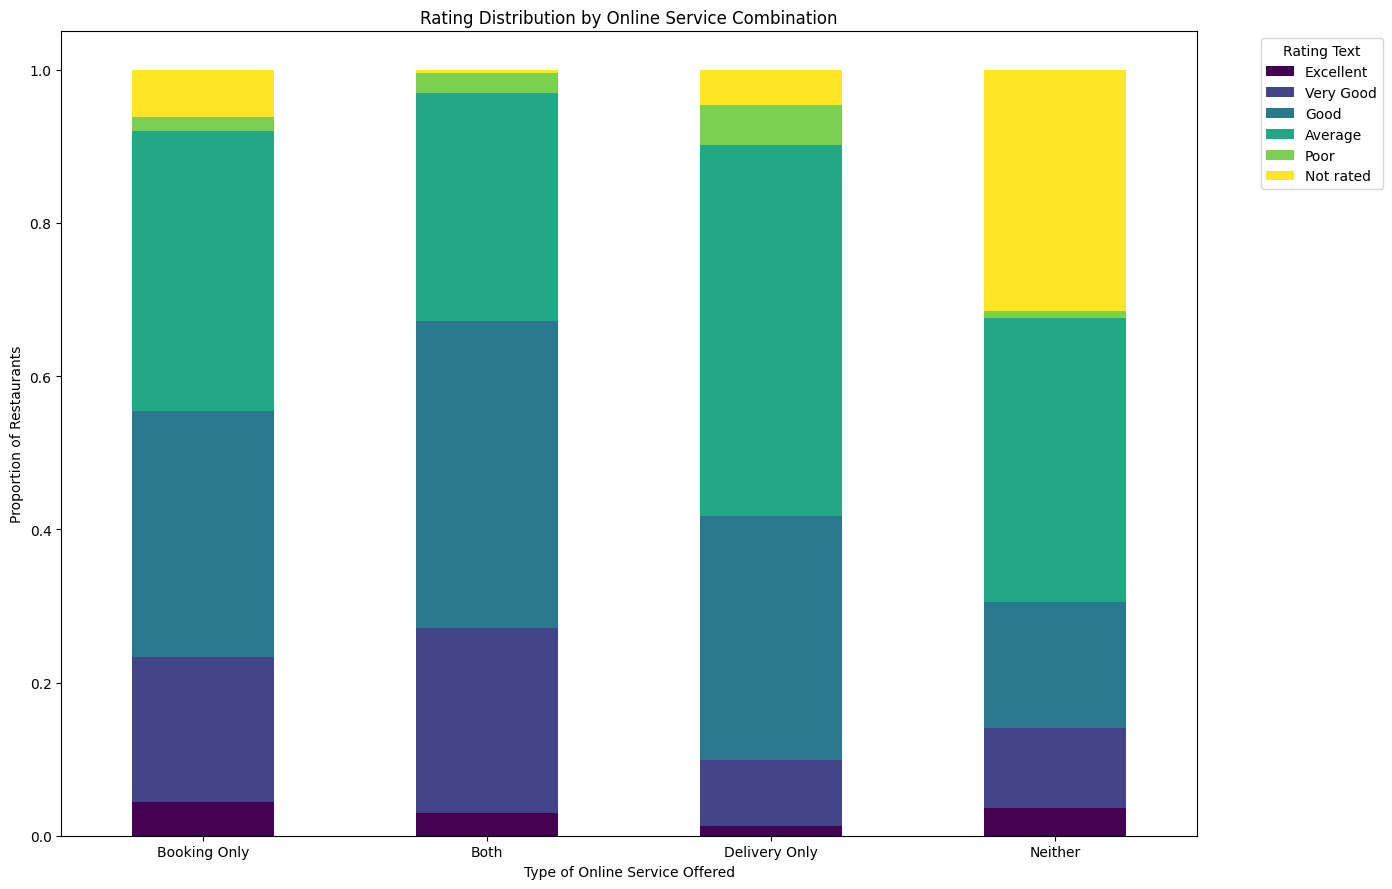

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a cross-tabulation of our new 'Online Services' category and 'Rating text'
services_rating_crosstab = pd.crosstab(df['Online Services'], df['Rating text'])

# Normalize the cross-tabulation to get proportions
services_rating_normalized = services_rating_crosstab.div(services_rating_crosstab.sum(axis=1), axis=0)

# Reorder the columns for a more logical visualization (from best rating to worst)
rating_order = ['Excellent', 'Very Good', 'Good', 'Average', 'Poor', 'Not rated']
services_rating_normalized = services_rating_normalized[rating_order]

# Plot the 100% stacked bar chart
services_rating_normalized.plot(kind='bar', stacked=True, figsize=(14, 9), colormap='viridis')

plt.title('Rating Distribution by Online Service Combination')
plt.xlabel('Type of Online Service Offered')
plt.ylabel('Proportion of Restaurants')
plt.xticks(rotation=0)
plt.legend(title='Rating Text', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [40]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Online Services
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Booking Only
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Booking Only
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Booking Only
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Neither
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Booking Only


In [41]:
price_range_counts = df['Price range'].value_counts()
print(price_range_counts)

Price range
1    4438
2    3113
3    1405
4     586
Name: count, dtype: int64


C:\Users\Tejas Bhosale\AppData\Local\Temp\ipykernel_30304\2156838762.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = price_range_counts.index, y= price_range_counts.values, palette = 'rocket')


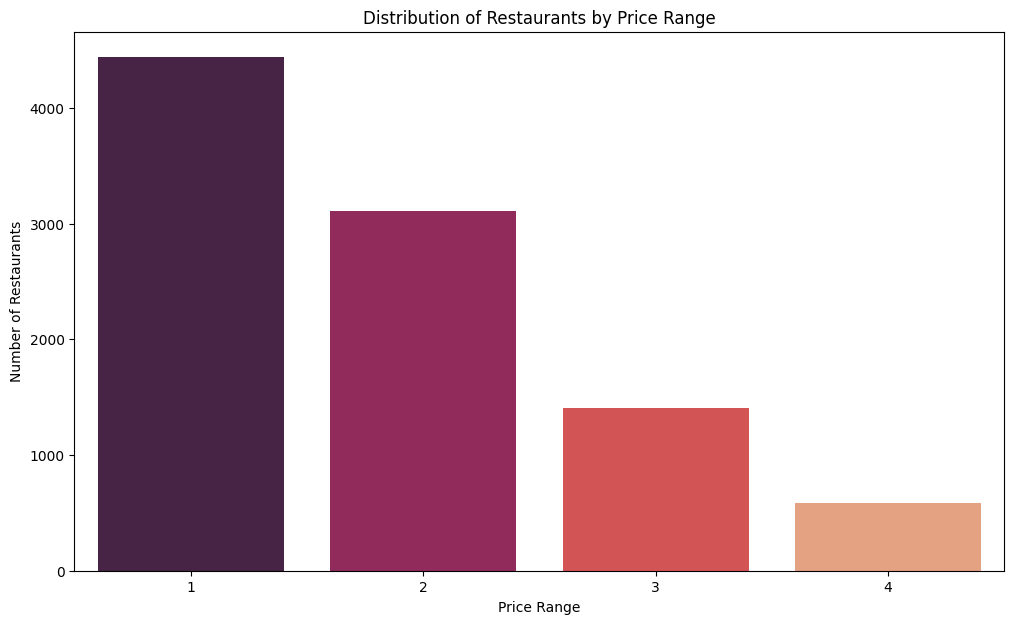

In [42]:
plt.figure(figsize = (12, 7))
sns.barplot(x = price_range_counts.index, y= price_range_counts.values, palette = 'rocket')
plt.title('Distribution of Restaurants by Price Range')
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.show()

In [43]:
price_delivery_crosstab = pd.crosstab(df['Price range'], df['Has Online delivery'])
price_table_booking_crosstab = pd.crosstab(df['Price range'], df['Has Table booking'])

print(price_delivery_crosstab)
print(price_table_booking_crosstab)

price_delivery_normalized = price_delivery_crosstab.div(price_delivery_crosstab.sum(axis = 1), axis = 0)
price_table_booking_normalized = price_table_booking_crosstab.div(price_table_booking_crosstab.sum(axis = 1), axis = 0)

Has Online delivery    No   Yes
Price range                    
1                    3737   701
2                    1827  1286
3                     994   411
4                     533    53
Has Table booking    No  Yes
Price range                 
1                  4437    1
2                  2874  239
3                   761  644
4                   312  274


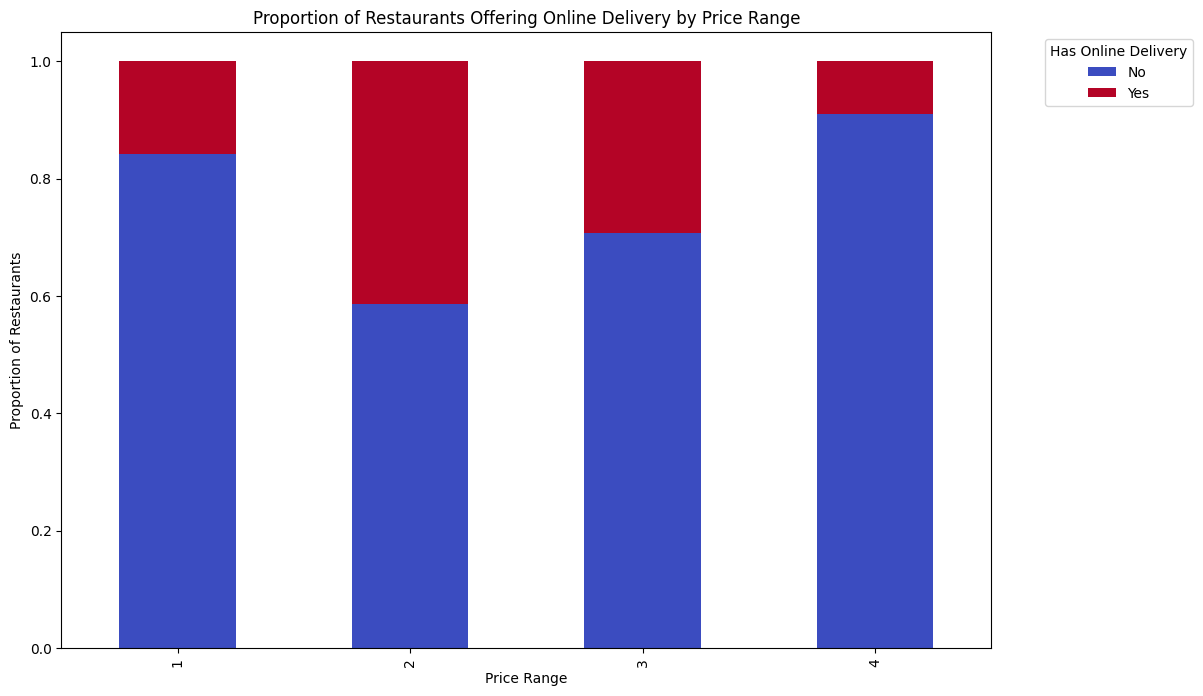

In [44]:
price_delivery_normalized.plot(kind = 'bar', stacked = True, figsize = (12, 8), colormap= 'coolwarm')
plt.title("Proportion of Restaurants Offering Online Delivery by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Proportion of Restaurants")
plt.legend(title = "Has Online Delivery", bbox_to_anchor = (1.05, 1), loc = "upper left")
plt.show()

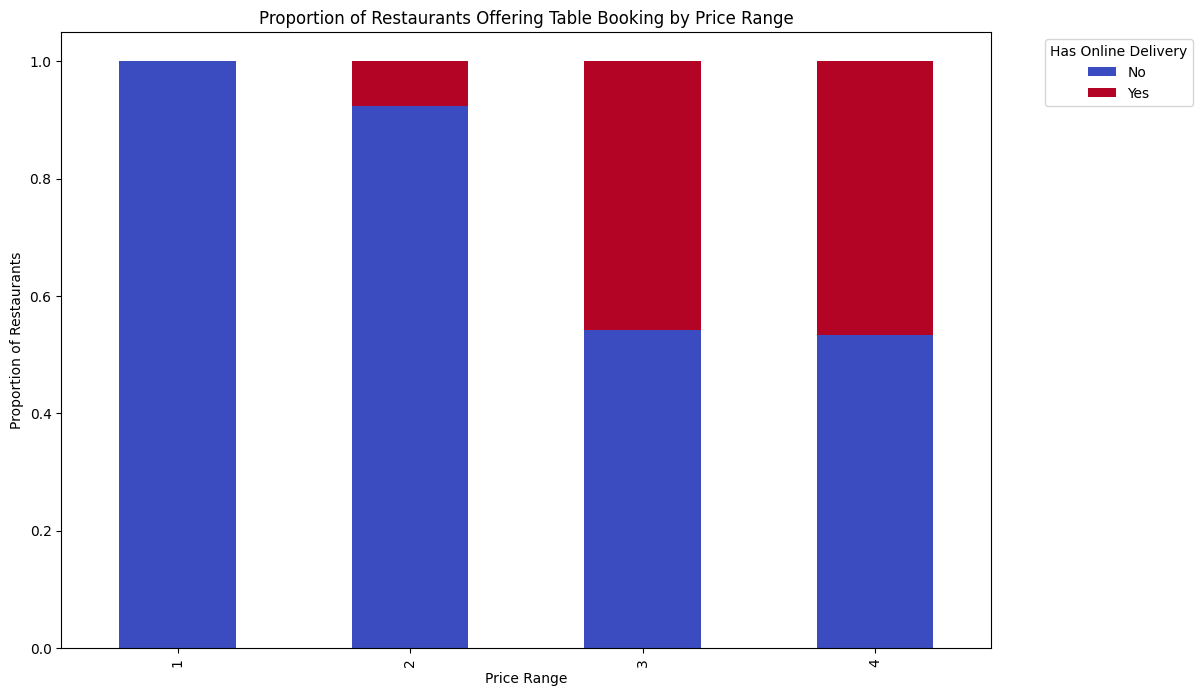

In [45]:
price_table_booking_normalized.plot(kind = 'bar', stacked = True, figsize = (12, 8), colormap= 'coolwarm')
plt.title("Proportion of Restaurants Offering Table Booking by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Proportion of Restaurants")
plt.legend(title = "Has Online Delivery", bbox_to_anchor = (1.05, 1), loc = "upper left")
plt.show()

In [46]:
price_rating_crosstab = pd.crosstab(df["Price range"], df["Rating text"])
print(price_rating_crosstab)

Rating text  Average  Excellent  Good  Not rated  Poor  Very Good
Price range                                                      
1               1895         31   606       1700    62        144
2               1425         69   794        402    98        325
3                313        126   496         35    20        415
4                101         74   200         11     6        194


In [47]:
price_rating_normalized = price_rating_crosstab.div(price_rating_crosstab.sum(axis = 1), axis = 0)
price_rating_normalized = price_rating_normalized[rating_order]


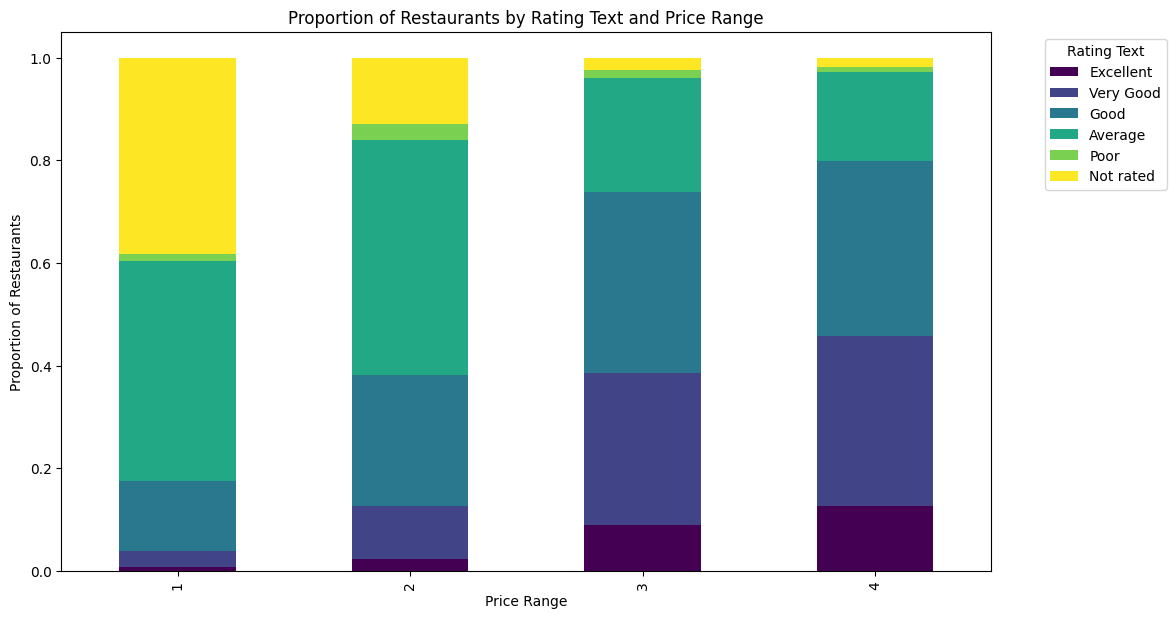

In [48]:
rating_order = ['Excellent', 'Very Good', 'Good', 'Average', 'Poor']
price_rating_normalized.plot(kind = 'bar', stacked = True, figsize = (12, 7), colormap = 'viridis')
plt.title("Proportion of Restaurants by Rating Text and Price Range")
plt.xlabel("Price Range")
plt.ylabel("Proportion of Restaurants")
plt.legend(title = "Rating Text", bbox_to_anchor = (1.05, 1), loc = "upper left")
plt.show()

In [49]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Online Services
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Booking Only
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Booking Only
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Booking Only
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Neither
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Booking Only


C:\Users\Tejas Bhosale\AppData\Local\Temp\ipykernel_30304\4216265544.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_cuisines.index, y = top_cuisines.values, palette = 'viridis')


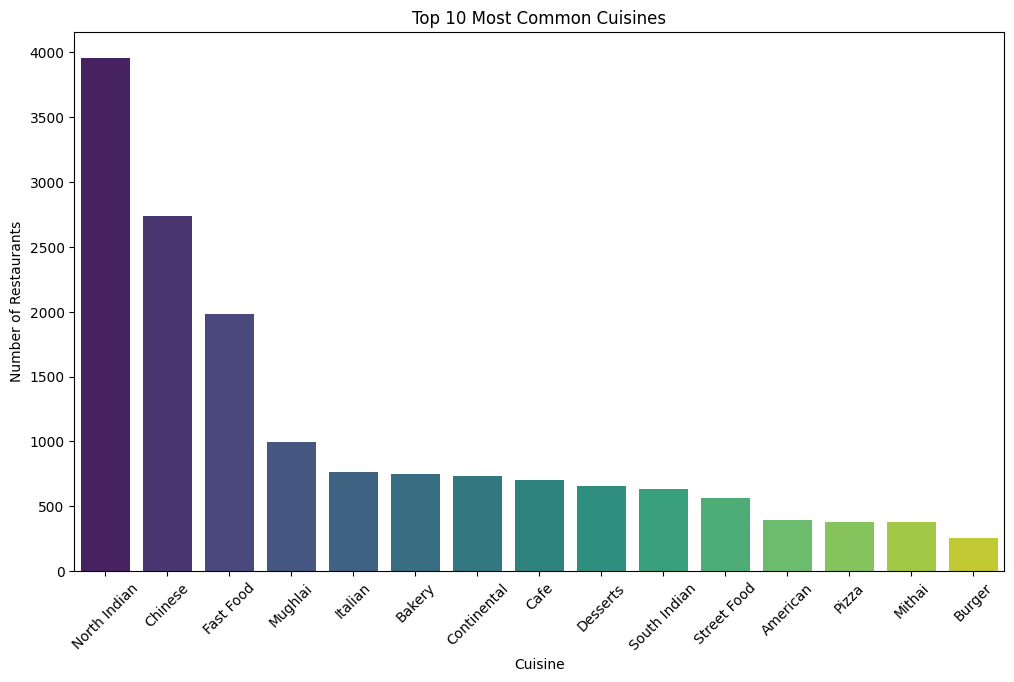

In [50]:
# Get a series of all individual cuisines
all_cuisines = df['Cuisines'].str.split(', ').explode()

# Count the occurence of each cuisine
top_cuisines = all_cuisines.value_counts().nlargest(15)

# Create bar chart 
plt.figure(figsize = (12, 7))
sns.barplot(x = top_cuisines.index, y = top_cuisines.values, palette = 'viridis')
plt.title("Top 10 Most Common Cuisines")
plt.xlabel("Cuisine")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation = 45)
plt.show()


Cuisine
American        3.661538
Italian         3.562042
Burger          3.520717
Continental     3.518750
Cafe            3.321195
Desserts        2.978867
Pizza           2.921785
Chinese         2.621024
Mughlai         2.609950
Fast Food       2.563092
North Indian    2.510455
South Indian    2.469811
Bakery          2.440940
Street Food     2.356050
Mithai          2.073684
Name: Aggregate rating, dtype: float64


C:\Users\Tejas Bhosale\AppData\Local\Temp\ipykernel_30304\176845679.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = average_rating_by_cuisine.index, y = average_rating_by_cuisine.values, palette = 'viridis' )


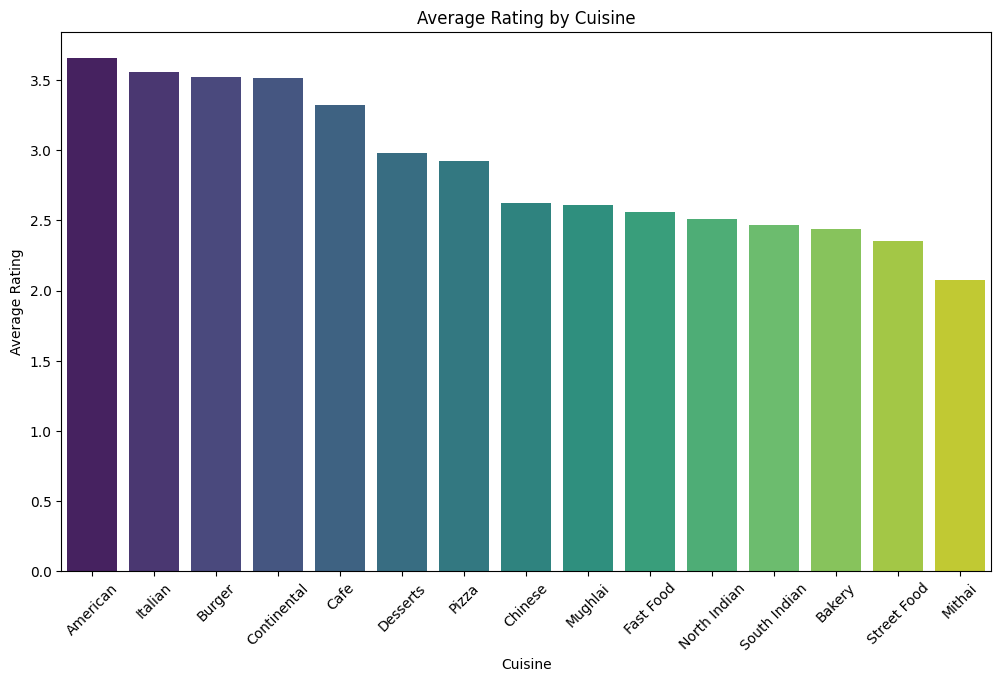

In [51]:
top_cuisines_list = all_cuisines.value_counts().nlargest(15).index

cuisine_ratings = df.assign(Cuisine = df['Cuisines'].str.split(', ')).explode('Cuisine')

top_cuisine_ratings = cuisine_ratings[cuisine_ratings["Cuisine"].isin(top_cuisines_list)]

average_rating_by_cuisine = top_cuisine_ratings.groupby('Cuisine')['Aggregate rating'].mean().sort_values(ascending = False)
print(average_rating_by_cuisine)

plt.figure(figsize = (12, 7))
sns.barplot(x = average_rating_by_cuisine.index, y = average_rating_by_cuisine.values, palette = 'viridis' )
plt.title('Average Rating by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.xticks(rotation = 45)
plt.show()

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

# --- Data Preparation ---
# Create a copy for modeling and remove 'Not Rated'
model_df = df[df['Rating text'] != 'Not rated'].copy()
# Create the 'Online Services' feature
def get_online_service(row):
    if row['Has Online delivery'] == 'Yes' and row['Has Table booking'] == 'Yes':
        return 'Both'
    elif row['Has Online delivery'] == 'Yes':
        return 'Delivery Only'
    elif row['Has Table booking'] == 'Yes':
        return 'Booking Only'
    else:
        return 'Neither'
model_df['Online Services'] = model_df.apply(get_online_service, axis=1)

# --- Feature Engineering with One-Hot Encoding ---
categorical_features = ['Price range', 'Online Services']
model_df_encoded = pd.get_dummies(model_df, columns=categorical_features, drop_first=True)
model_df_encoded['Cuisine Count'] = model_df_encoded['Cuisines'].apply(lambda x: len(x.split(', ')))

# # --- Stratified Splitting ---
model_df_encoded['rating_cat'] = pd.cut(model_df_encoded['Aggregate rating'],
                                        bins=[0., 2.4, 3.4, 3.9, 4.4, 5.],
                                        labels=[1, 2, 3, 4, 5])

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(model_df_encoded, model_df_encoded['rating_cat']):
    strat_train_set = model_df_encoded.iloc[train_index]
    strat_test_set = model_df_encoded.iloc[test_index]

# --- CORRECTED Feature Selection ---
# The list now correctly includes 'Online Services_Both'
features_to_use = [
    'Cuisine Count', 'Price range_2', 'Price range_3', 'Price range_4',
    'Online Services_Both', 'Online Services_Delivery Only', 'Online Services_Neither'
]
X_train = strat_train_set[features_to_use]
y_train = strat_train_set['Aggregate rating']
X_test = strat_test_set[features_to_use]
y_test = strat_test_set['Aggregate rating']

print("Data prepared with One-Hot Encoding and Stratified Splitting.")
print(f"Training set has {X_train.shape[0]} samples.")
print(f"Testing set has {X_test.shape[0]} samples.")
print("\nFirst 5 rows of our new feature set (X_train):")
print(X_train.head())

Data prepared with One-Hot Encoding and Stratified Splitting.
Training set has 5915 samples.
Testing set has 1479 samples.

First 5 rows of our new feature set (X_train):
      Cuisine Count  Price range_2  Price range_3  Price range_4  \
4611              1          False          False          False   
3910              2          False          False          False   
5506              3          False          False          False   
6701              3          False           True          False   
5377              1          False          False          False   

      Online Services_Both  Online Services_Delivery Only  \
4611                 False                           True   
3910                 False                          False   
5506                 False                           True   
6701                 False                          False   
5377                 False                          False   

      Online Services_Neither  
4611                 

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 1.0}
Tuned XGBoost Train RMSE: 0.4876
Tuned XGBoost Test RMSE: 0.4869


C:\Users\Tejas Bhosale\AppData\Local\Temp\ipykernel_30304\920816259.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=xgb_best_importances, y=xgb_best_importances.index, palette='mako')


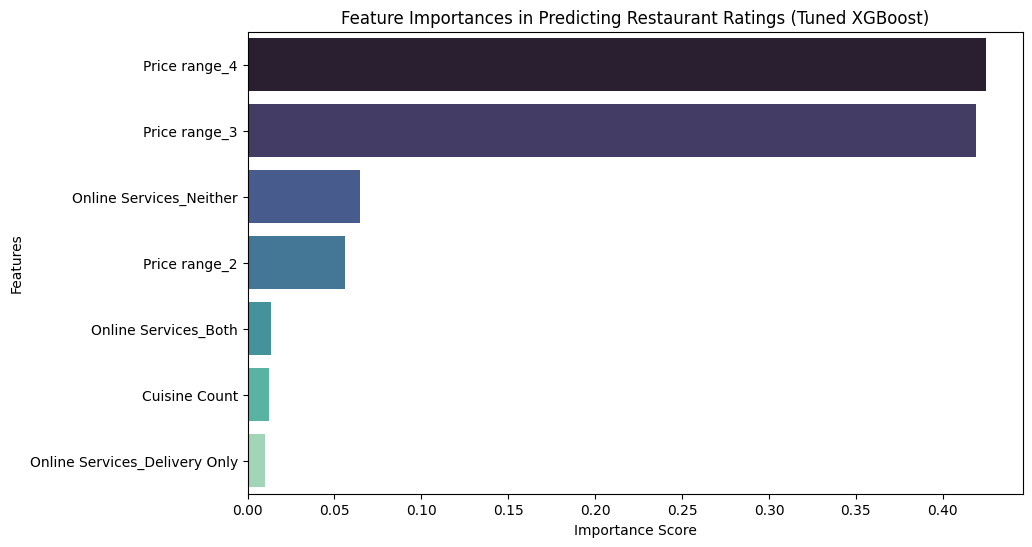


Tuned XGBoost Feature Importances:
Price range_4                    0.424621
Price range_3                    0.418813
Online Services_Neither          0.064501
Price range_2                    0.055833
Online Services_Both             0.013691
Cuisine Count                    0.012376
Online Services_Delivery Only    0.010165
dtype: float32


In [64]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV 
import xgboost as xgb

# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# param_grid = {
#     'n_estimators': [100, 150, 200],
#     'max_depth' : [10, 20 , 30,None],
#     'min_samples_split' : [2, 5, 3],
#     'min_samples_leaf' : [1, 2, 3]
# }

# # Initializze GridSearchCV 
# grid_search = GridSearchCV(estimator= rf_model, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, scoring = "neg_mean_squared_error" )

# # Fit GridSearchCV
# grid_search.fit(X_train, y_train)

# # Get the best model 
# best_rf = grid_search.best_estimator_
# print(f"Best Parameters: {grid_search.best_params_}")

# train_predictions = best_rf.predict(X_train)
# train_mse = mean_squared_error(y_train, train_predictions)
# train_rmse = np.sqrt(train_mse)

# print("Train RMSE: ", train_rmse)

# y_pred_test = best_rf.predict(X_test)
# test_rmse =np.sqrt(mean_squared_error(y_test, y_pred_test))
# print("Test RMSE: ", test_rmse)

# # Initialize the XGBoost Regressor 
# xgb_model = xgb.XGBRegressor(objective = "reg:squarederror", n_estimators = 100, learning_rate = 0.05, max_depth= 5, subsample = 0.8, colsample_bytree = 0.8, random_state = 42, n_jobs = -1, early_stopping_rounds = 50)

# xgb_model.fit(X_train, y_train, 
#               eval_set = [(X_test, y_test)],
#               verbose = False)

# xgb_y_pred_train = xgb_model.predict(X_train)
# xgb_train_mse = mean_squared_error(y_train, xgb_y_pred_train)
# xgb_train_rmse = np.sqrt(xgb_train_mse)
# print("XGBoost Train RMSE: ", xgb_train_rmse)

# xgb_y_pred_test = xgb_model.predict(X_test)
# xgb_test_mse = mean_squared_error(y_test, xgb_y_pred_test)
# xgb_test_rmse = np.sqrt(xgb_test_mse)
# print("XGBoost Test RMSE: ", xgb_test_rmse)

# ----- Hyperparameter tuning for XGBoost -----
param_grid_xgb = {
    'n_estimators': [500, 750, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize the xgboost regressor 
# We remove early_stopping_rounds here because GridSearchCV handles the cross-validation
xgb_grid_model = xgb.XGBRegressor(objective ="reg:squarederror", random_state = 42, n_jobs = -1)
xgb_grid_search = GridSearchCV(estimator=xgb_grid_model, param_grid=param_grid_xgb, cv=3, n_jobs=-1, verbose=2, scoring="neg_mean_squared_error")

# Fit GridSearchCV
xgb_grid_search.fit(X_train, y_train)

# Get the best model 
best_xgb = xgb_grid_search.best_estimator_
print(f"Best Parameters: {xgb_grid_search.best_params_}")

# Make predictions with the best tuned XGBoost model

train_y_pred_best_xgb = best_xgb.predict(X_train)
# Calculate the final RMSE
train_rmse_best_xgb = np.sqrt(mean_squared_error(y_train, train_y_pred_best_xgb))
print(f'Tuned XGBoost Train RMSE: {train_rmse_best_xgb:.4f}')

y_pred_best_xgb = best_xgb.predict(X_test)
# Calculate the final RMSE
test_rmse_best_xgb = np.sqrt(mean_squared_error(y_test, y_pred_best_xgb))
print(f'Tuned XGBoost Test RMSE: {test_rmse_best_xgb:.4f}')

# --- 10. Feature Importance Analysis (for Tuned XGBoost) ---
# Get feature importances from the best XGBoost model
xgb_best_importances = pd.Series(best_xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_best_importances, y=xgb_best_importances.index, palette='mako')
plt.title('Feature Importances in Predicting Restaurant Ratings (Tuned XGBoost)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

print("\nTuned XGBoost Feature Importances:")
print(xgb_best_importances)



# --- Feature Importance Analysis (for XGBoost) ---
# Get feature importances from the XGBoost model
# xgb_importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# # Plot feature importances
# plt.figure(figsize=(10, 6))
# sns.barplot(x=xgb_importances, y=xgb_importances.index, palette='mako')
# plt.title('Feature Importances in Predicting Restaurant Ratings (XGBoost)')
# plt.xlabel('Importance Score')
# plt.ylabel('Features')
# plt.show()

# print("\nXGBoost Feature Importances:")
# print(xgb_importances)

# # --- Feature Importance ---
# # See which features the model relied on most
# feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# # --- Visualize the Results ---
# plt.figure(figsize=(8, 8))
# sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.5)
# plt.xlabel("Actual Ratings")
# plt.ylabel("Predicted Ratings")
# plt.title("Model Performance: Actual vs. Predicted Ratings")
# # Add a line for perfect predictions
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
# plt.show()

# # --- Feature Importance ---
# # See which features the model relied on most
# feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
# plt.figure(figsize=(10, 6))
# sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
# plt.title('Feature Importances in Predicting Restaurant Ratings')
# plt.xlabel('Importance Score')
# plt.ylabel('Features')
# plt.show()

# print("\nFeature Importances:")
# print(feature_importances)